<a href="https://colab.research.google.com/github/rahulrkumar9000/Datascience/blob/master/Disease_Detection_using_X_Rays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns
sns.set()
from keras.applications.densenet import DenseNet121
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras import backend as K

from keras.models import load_model

In [0]:
train_df= pd.read_csv("/content/drive/My Drive/new/nih/train-small.csv")

In [0]:
print(f"there are {train_df.shape[0]} rows and {train_df.shape[1]} columns in the data")

there are 1000 rows and 16 columns in the data


In [0]:
train_df.head()

,Image,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,PatientId,Pleural_Thickening,Pneumonia,Pneumothorax
0,00008270_015.png,0,0,0,0,0,0,0,0,0,0,0,8270,0,0,0
1,00029855_001.png,1,0,0,0,1,0,0,0,1,0,0,29855,0,0,0
2,00001297_000.png,0,0,0,0,0,0,0,0,0,0,0,1297,1,0,0
3,00012359_002.png,0,0,0,0,0,0,0,0,0,0,0,12359,0,0,0
4,00017951_001.png,0,0,0,0,0,0,0,0,1,0,0,17951,0,0,0


In [0]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Image               1000 non-null   object
 1   Atelectasis         1000 non-null   int64 
 2   Cardiomegaly        1000 non-null   int64 
 3   Consolidation       1000 non-null   int64 
 4   Edema               1000 non-null   int64 
 5   Effusion            1000 non-null   int64 
 6   Emphysema           1000 non-null   int64 
 7   Fibrosis            1000 non-null   int64 
 8   Hernia              1000 non-null   int64 
 9   Infiltration        1000 non-null   int64 
 10  Mass                1000 non-null   int64 
 11  Nodule              1000 non-null   int64 
 12  PatientId           1000 non-null   int64 
 13  Pleural_Thickening  1000 non-null   int64 
 14  Pneumonia           1000 non-null   int64 
 15  Pneumothorax        1000 non-null   int64 
dtypes: int64(15), object(1)
m

In [0]:
print(f"The total patient IDs are {train_df['PatientId'].count()},from those the unique Ids are {train_df['PatientId'].value_counts().shape[0]} ")

The total patient IDs are 1000,from those the unique Ids are 928 


In [0]:
column=train_df.columns
column=list(column)


In [0]:
column

['Image',
 'Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Effusion',
 'Emphysema',
 'Fibrosis',
 'Hernia',
 'Infiltration',
 'Mass',
 'Nodule',
 'PatientId',
 'Pleural_Thickening',
 'Pneumonia',
 'Pneumothorax']

In [0]:
column.remove("Image")
column.remove("PatientId")
column


['Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Effusion',
 'Emphysema',
 'Fibrosis',
 'Hernia',
 'Infiltration',
 'Mass',
 'Nodule',
 'Pleural_Thickening',
 'Pneumonia',
 'Pneumothorax']

In [0]:
for colum in column:
    print(f' {colum} has got {train_df[colum].sum()} cases')

 Atelectasis has got 106 cases
 Cardiomegaly has got 20 cases
 Consolidation has got 33 cases
 Edema has got 16 cases
 Effusion has got 128 cases
 Emphysema has got 13 cases
 Fibrosis has got 14 cases
 Hernia has got 2 cases
 Infiltration has got 175 cases
 Mass has got 45 cases
 Nodule has got 54 cases
 Pleural_Thickening has got 21 cases
 Pneumonia has got 10 cases
 Pneumothorax has got 38 cases


In [0]:
images= train_df['Image'].values
images

array(['00008270_015.png', '00029855_001.png', '00001297_000.png',
       '00012359_002.png', '00017951_001.png', '00001232_002.png',
       '00017135_000.png', '00027235_000.png', '00014197_007.png',
       '00011584_002.png', '00028208_026.png', '00015929_002.png',
       '00009911_001.png', '00026232_006.png', '00017417_004.png',
       '00012045_038.png', '00013710_000.png', '00005410_000.png',
       '00008515_006.png', '00028574_000.png', '00021441_000.png',
       '00010877_000.png', '00016030_004.png', '00012753_004.png',
       '00011315_001.png', '00020471_002.png', '00012966_000.png',
       '00012045_053.png', '00011579_036.png', '00020240_001.png',
       '00023309_030.png', '00021376_000.png', '00016719_029.png',
       '00016604_000.png', '00012615_000.png', '00026576_000.png',
       '00022572_028.png', '00008068_005.png', '00005759_014.png',
       '00027665_000.png', '00029047_000.png', '00009447_000.png',
       '00027900_000.png', '00017702_000.png', '00017126_000.p

In [0]:
random_images=[np.random.choice(images) for i in range(10)]
random_images

['00026810_041.png',
 '00013804_000.png',
 '00007781_001.png',
 '00030162_003.png',
 '00013449_003.png',
 '00002350_018.png',
 '00003395_007.png',
 '00013603_000.png',
 '00026246_000.png',
 '00011696_003.png']

Display random images


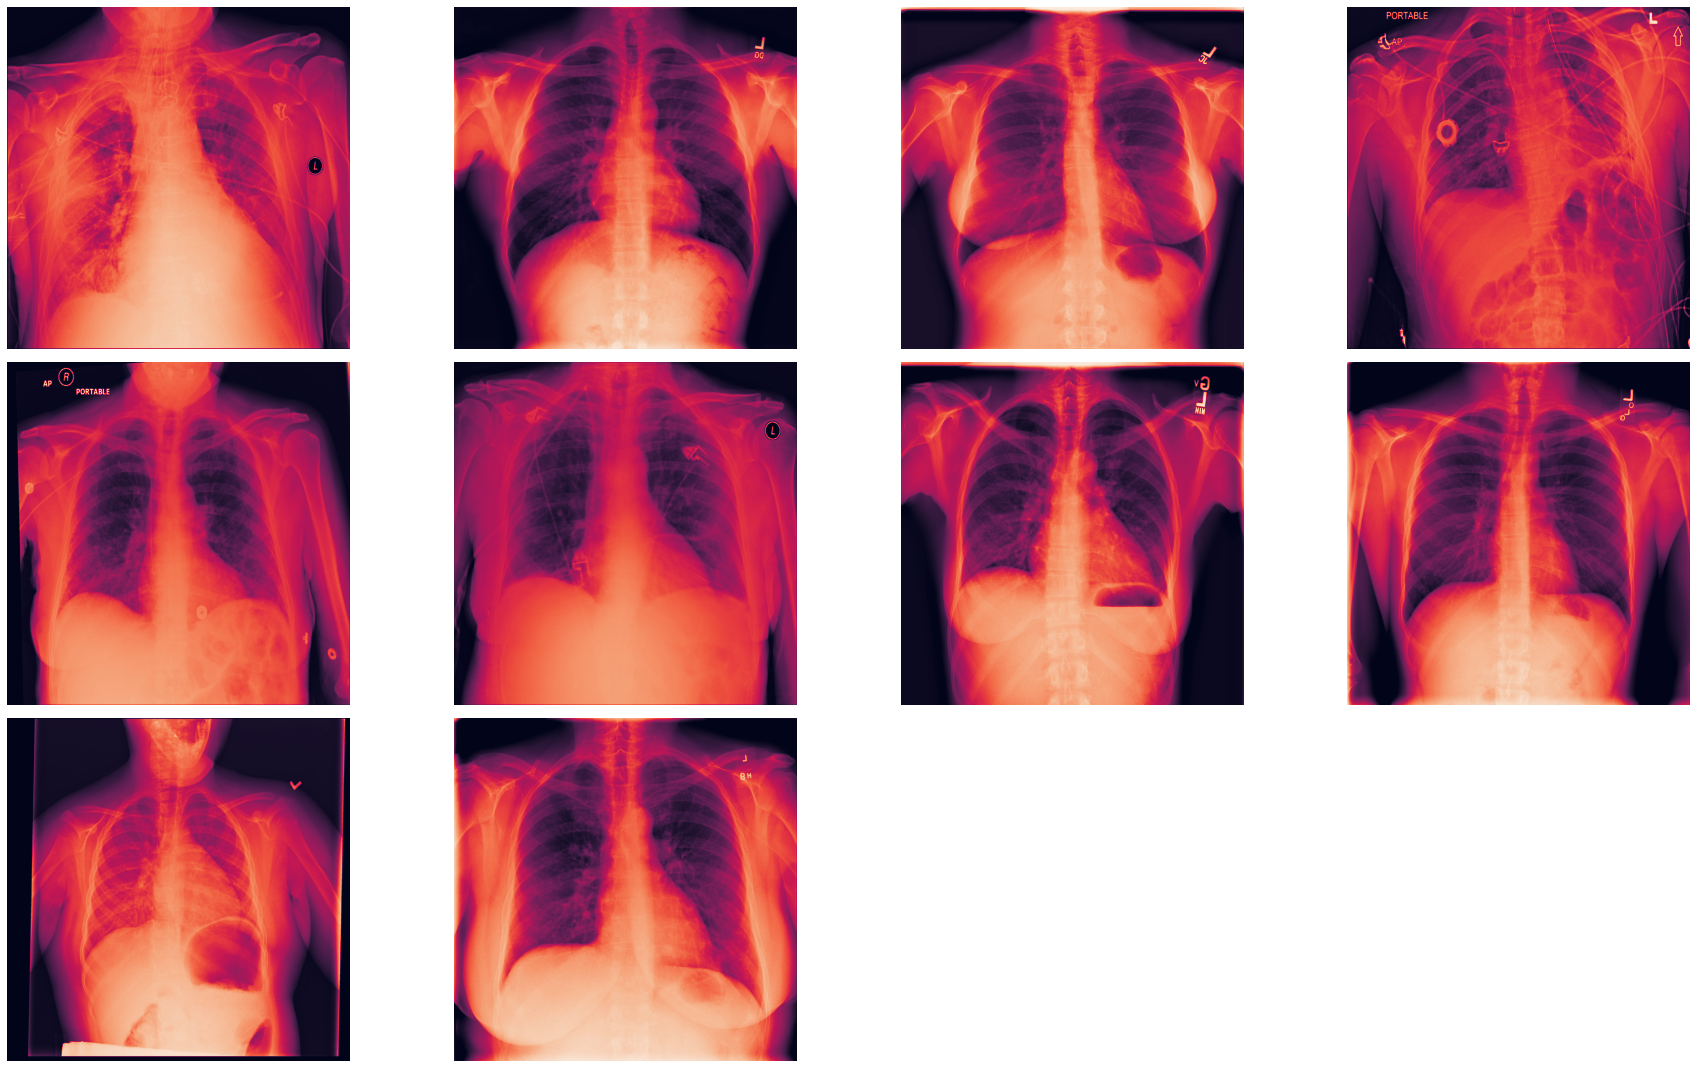

In [0]:
img_dir = '/content/drive/My Drive/new/nih/images-small'

print("Display random images")

plt.figure(figsize=(25,15))

for i in range(10):
    plt.subplot(3, 4, i + 1)
    img = plt.imread(os.path.join(img_dir, random_images[i]))
    plt.imshow(img)
    plt.axis('off')
    
# Adjust subplot parameters to give specified padding
plt.tight_layout()

The dimensions of the image are 1024 pixels width and 1024 pixels height, one single color channel
The maximum pixel value is 0.9804 and the minimum is 0.0000
The mean value of the pixels is 0.4796 and the standard deviation is 0.2757


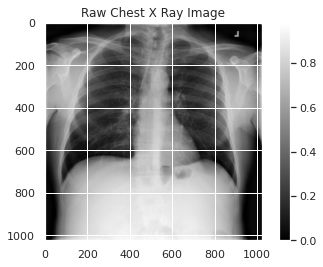

In [0]:
sample_img= train_df["Image"][0]

img= plt.imread(os.path.join(img_dir,sample_img))
plt.imshow(img, cmap="gray")
plt.colorbar()
plt.title('Raw Chest X Ray Image')
print(f"The dimensions of the image are {img.shape[0]} pixels width and {img.shape[1]} pixels height, one single color channel")
print(f"The maximum pixel value is {img.max():.4f} and the minimum is {img.min():.4f}")
print(f"The mean value of the pixels is {img.mean():.4f} and the standard deviation is {img.std():.4f}")

In [0]:
img.shape

(1024, 1024)

Text(0.5, 0, 'intensity')

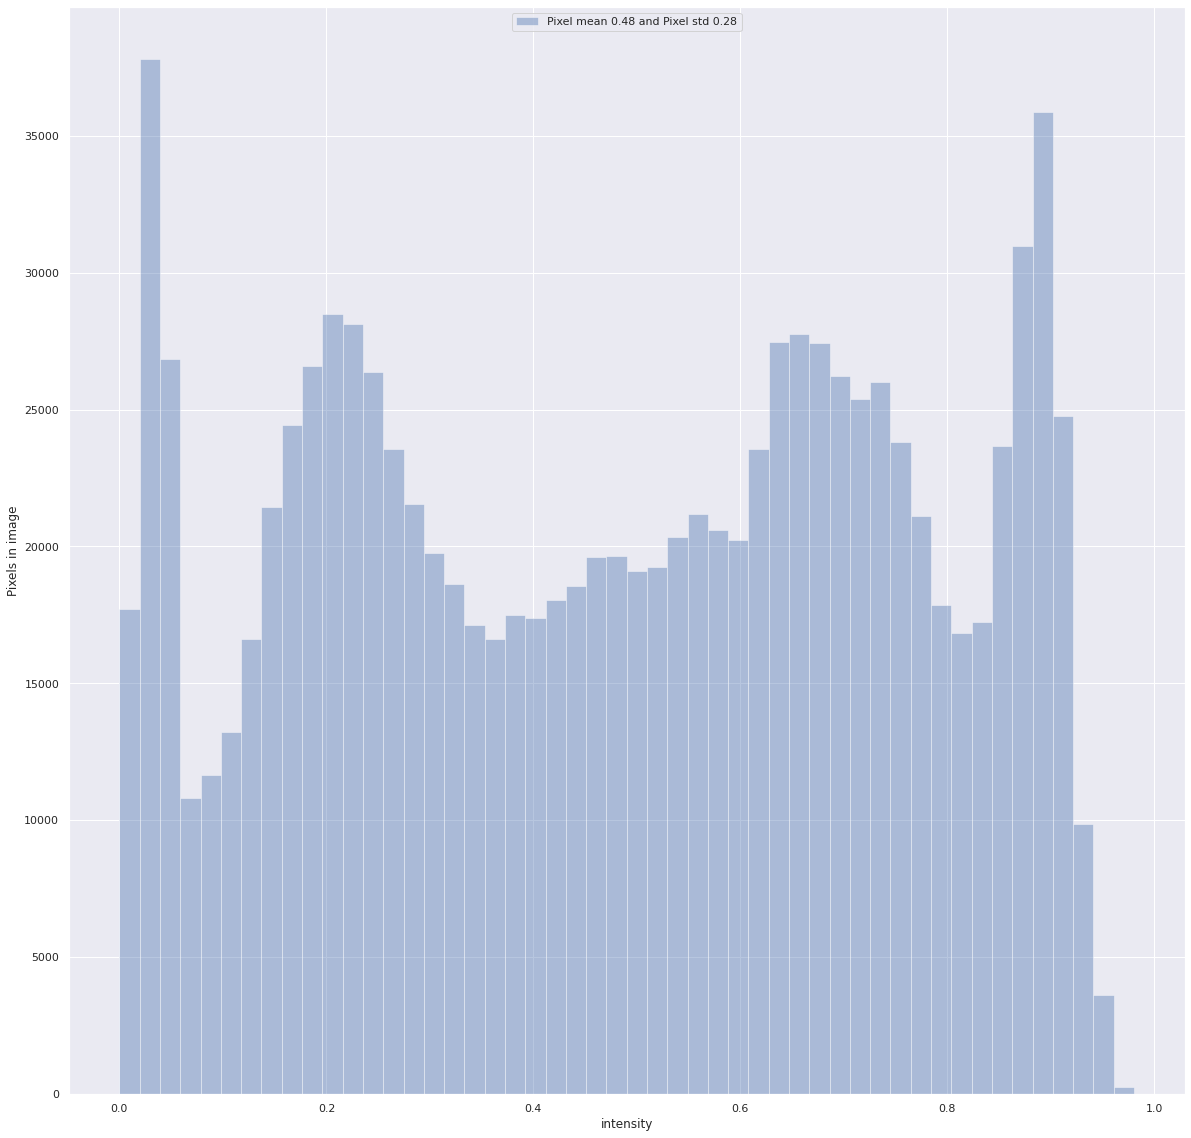

In [0]:
plt.figure(figsize=(20,20))
sns.distplot(img,label=f'Pixel mean {np.mean(img):.2f} and Pixel std {np.std(img):.2f}',kde=False)
plt.legend(loc='upper center')
plt.ylabel("Pixels in image")
plt.xlabel("intensity")

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
# Normalize images
image_generator = ImageDataGenerator(
    samplewise_center=True, 
    samplewise_std_normalization= True
)

In [0]:
# Flow from directory with batch size and target image size
generator = image_generator.flow_from_dataframe(
        dataframe=train_df,
        directory="/content/drive/My Drive/new/nih/images-small",
        x_col="Image", # features
        y_col= ['Mass'], # labels
        class_mode="raw", # 'Mass' column should be in train_df
        batch_size= 1, # images per batch
        shuffle=False, # shuffle the rows or not
        target_size=(320,320) # width and height of output image
)

Found 1000 validated image filenames.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The dimensions of the image are 320 pixels width and 320 pixels height
The maximum pixel value is 1.7999 and the minimum is -1.7404
The mean value of the pixels is 0.0000 and the standard deviation is 1.0000


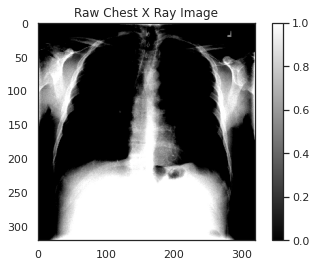

In [0]:
sns.set_style("white")
generated_image, label = generator.__getitem__(0)
plt.imshow(generated_image[0], cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')
print(f"The dimensions of the image are {generated_image.shape[1]} pixels width and {generated_image.shape[2]} pixels height")
print(f"The maximum pixel value is {generated_image.max():.4f} and the minimum is {generated_image.min():.4f}")
print(f"The mean value of the pixels is {generated_image.mean():.4f} and the standard deviation is {generated_image.std():.4f}")

In [0]:
def check_for_leakage(df1, df2, patient_col):
    
    df1_patients_unique = set(df1[patient_col].values)
    df2_patients_unique = set(df2[patient_col].values)
    patients_in_both_groups = list(df1_patients_unique.intersection(df2_patients_unique)) 
    leakage = len(patients_in_both_groups) > 0 
    return leakage

In [0]:
valid_df = pd.read_csv("/content/drive/My Drive/new/nih/valid-small2.csv")
test_df = pd.read_csv("/content/drive/My Drive/new/nih/test2.csv")

In [0]:
print("leakage between train and test: {}".format(check_for_leakage(train_df, test_df, 'PatientId')))
print("leakage between valid and test: {}".format(check_for_leakage(valid_df, test_df, 'PatientId')))

leakage between train and test: False
leakage between valid and test: True


In [0]:
def get_train_generator(df, image_dir, x_col, y_cols, shuffle=True, batch_size=8, seed=1, target_w = 320, target_h = 320):
   
    print("getting train generator...") 
    # normalize images
    image_generator = ImageDataGenerator(
        samplewise_center=True,
        samplewise_std_normalization= True)
    
    # flow from directory with batch size and target image size
    generator = image_generator.flow_from_dataframe(
            dataframe=df,
            directory=image_dir,
            x_col=x_col,
            y_col=y_cols,
            class_mode="raw",
            batch_size=batch_size,
            shuffle=shuffle,
            seed=seed,
            target_size=(target_w,target_h),validate_filenames=False)
    
    return generator

In [0]:
def get_test_and_valid_generator(valid_df, test_df, train_df, image_dir, x_col, y_cols, sample_size=100, batch_size=8, seed=1, target_w = 320, target_h = 320):
   
    print("getting train and valid generators...")
    # get generator to sample dataset
    raw_train_generator = ImageDataGenerator().flow_from_dataframe(
        dataframe=train_df, 
        directory=IMAGE_DIR, 
        x_col="Image", 
        y_col=labels, 
        class_mode="raw", 
        batch_size=sample_size, 
        shuffle=True, 
        target_size=(target_w, target_h))
    
    # get data sample
    batch = raw_train_generator.next()
    data_sample = batch[0]

    # use sample to fit mean and std for test set generator
    image_generator = ImageDataGenerator(
        featurewise_center=True,
        featurewise_std_normalization= True)
    
    # fit generator to sample from training data
    image_generator.fit(data_sample)

    # get test generator
    valid_generator = image_generator.flow_from_dataframe(
            dataframe=valid_df,
            directory=image_dir,
            x_col=x_col,
            y_col=y_cols,
            class_mode="raw",
            batch_size=batch_size,
            shuffle=False,
            seed=seed,
            target_size=(target_w,target_h))

    test_generator = image_generator.flow_from_dataframe(
            dataframe=test_df,
            directory=image_dir,
            x_col=x_col,
            y_col=y_cols,
            class_mode="raw",
            batch_size=batch_size,
            shuffle=False,
            seed=seed,
            target_size=(target_w,target_h))
    return valid_generator, test_generator

In [0]:
labels = ['Cardiomegaly', 
          'Emphysema', 
          'Effusion', 
          'Hernia', 
          'Infiltration', 
          'Mass', 
          'Nodule', 
          'Atelectasis',
          'Pneumothorax',
          'Pleural_Thickening', 
          'Pneumonia', 
          'Fibrosis', 
          'Edema', 
          'Consolidation']

In [0]:
IMAGE_DIR = "/content/drive/My Drive/new/nih/images-small"
train_generator = get_train_generator(train_df, IMAGE_DIR, "Image", labels)
valid_generator, test_generator= get_test_and_valid_generator(valid_df, test_df, train_df, IMAGE_DIR, "Image", labels)

getting train generator...
Found 1000 non-validated image filenames.
getting train and valid generators...
Found 1000 validated image filenames.
Found 358 validated image filenames.
Found 61 validated image filenames.


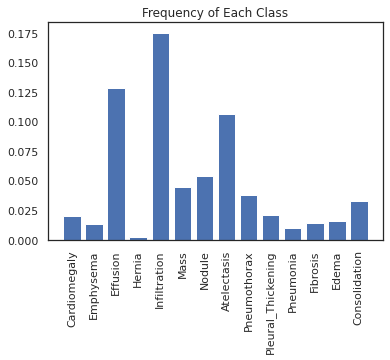

In [0]:
plt.xticks(rotation=90)
plt.bar(x=labels, height=np.mean(train_generator.labels, axis=0))
plt.title("Frequency of Each Class")
plt.show()

In [0]:
def compute_class_freqs(labels):
    
    # total number of patients
    N = labels.shape[0]
    
    positive_frequencies = np.sum(labels,axis=0) /N
    negative_frequencies = 1- positive_frequencies 

    return positive_frequencies, negative_frequencies

In [0]:
freq_pos, freq_neg = compute_class_freqs(train_generator.labels)

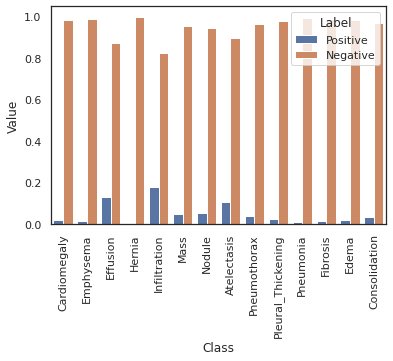

In [0]:
data = pd.DataFrame({"Class": labels, "Label": "Positive", "Value": freq_pos})
data = data.append([{"Class": labels[l], "Label": "Negative", "Value": v} for l,v in enumerate(freq_neg)], ignore_index=True)
plt.xticks(rotation=90)
f = sns.barplot(x="Class", y="Value", hue="Label" ,data=data)

In [0]:
pos_weights = freq_neg
neg_weights = freq_pos
pos_contribution = freq_pos * pos_weights 
neg_contribution = freq_neg * neg_weights

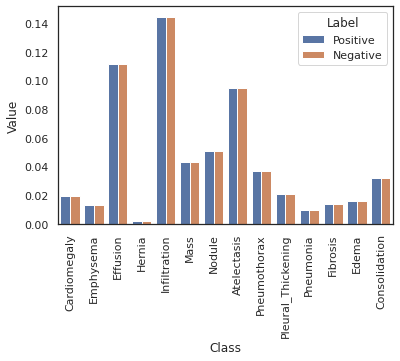

In [0]:
data = pd.DataFrame({"Class": labels, "Label": "Positive", "Value": pos_contribution})
data = data.append([{"Class": labels[l], "Label": "Negative", "Value": v} 
                        for l,v in enumerate(neg_contribution)], ignore_index=True)
plt.xticks(rotation=90)
sns.barplot(x="Class", y="Value", hue="Label" ,data=data);

In [0]:
def get_weighted_loss(pos_weights, neg_weights, epsilon=1e-7):
   
    def weighted_loss(y_true, y_pred):
       
     
        loss = 0.0
        
        
        for i in range(len(pos_weights)):
            # for each class, add average weighted loss for that class 
            loss += -(K.mean( pos_weights[i] * y_true[:,i] * K.log(y_pred[:,i] + epsilon) + neg_weights[i] * (1 - y_true[:,i]) * K.log(1 - y_pred[:,i] + epsilon), axis = 0))  #complete this line
        return loss
    
       
    return weighted_loss

In [0]:
base_model = DenseNet121(weights='/content/drive/My Drive/new/nih/densenet.hdf5', include_top=False)

x = base_model.output

# adding a global spatial average pooling layer
x = GlobalAveragePooling2D()(x)

# and a logistic layer
predictions = Dense(len(labels), activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss=get_weighted_loss(pos_weights, neg_weights))

Epoch 1/50
100/100 [==============================] - 814s 8s/step - loss: 0.9086 - val_loss: 30.2373

Epoch 00001: val_loss improved from inf to 30.23727, saving model to /content/drive/My Drive/new/nih/file.h5
Epoch 2/50
100/100 [==============================] - 223s 2s/step - loss: 0.8471 - val_loss: 20.1936

Epoch 00002: val_loss improved from 30.23727 to 20.19363, saving model to /content/drive/My Drive/new/nih/file.h5
Epoch 3/50
100/100 [==============================] - 50s 503ms/step - loss: 0.8538 - val_loss: 2.3665

Epoch 00003: val_loss improved from 20.19363 to 2.36648, saving model to /content/drive/My Drive/new/nih/file.h5
Epoch 4/50
100/100 [==============================] - 51s 505ms/step - loss: 0.8287 - val_loss: 4.2431

Epoch 00004: val_loss did not improve from 2.36648
Epoch 5/50
100/100 [==============================] - 50s 503ms/step - loss: 0.8220 - val_loss: 1.5025

Epoch 00005: val_loss improved from 2.36648 to 1.50246, saving model to /content/drive/My Drive

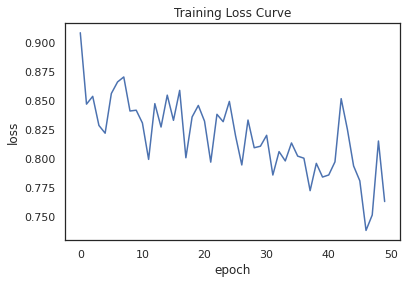

In [0]:
from keras.callbacks import ModelCheckpoint
best_model_file = "/content/drive/My Drive/new/nih/file.h5"
checkpoint = ModelCheckpoint(best_model_file,
                             monitor='val_loss', mode='min',verbose=1, save_best_only=True)

history = model.fit_generator(train_generator, 
                              validation_data=valid_generator,
                              steps_per_epoch=100, 
                              validation_steps=25, 
                              epochs = 50,callbacks=[checkpoint])

plt.plot(history.history['loss'])
plt.ylabel("loss")
plt.xlabel("epoch")
plt.title("Training Loss Curve")
plt.show()

In [0]:
predicted_vals = model.predict_generator(test_generator, steps = len(test_generator))

KeyError: ignored

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict_generator(valid_generator, len(valid_generator))
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(valid_generator.classes, y_pred))
print('Classification Report')
print(classification_report(valid_generator.classes, y_pred))

Confusion Matrix


AttributeError: ignored

In [0]:
model=load_model("/content/drive/My Drive/new/nih/file.h5")

ValueError: ignored

In [0]:
model.load_weights("/content/drive/My Drive/new/nih/pretrained_model.h5")

In [0]:
predicted_vals = model.predict_generator(valid_generator, steps = len(valid_generator))

In [0]:
predicted_train=model.predict_generator(train_generator, steps = len(train_generator))

In [0]:
pred_val= pd.DataFrame(predicted_vals,columns= ['p_Cardiomegaly', 
          'p_Emphysema', 
          'p_Effusion', 
          'p_Hernia', 
          'p_Infiltration', 
          'p_Mass', 
          'p_Nodule', 
          'p_Atelectasis',
          'p_Pneumothorax',
          'p_Pleural_Thickening', 
          'p_Pneumonia', 
          'p_Fibrosis', 
          'p_Edema', 
          'p_Consolidation'])

In [0]:
pred_val.to_csv("/content/drive/My Drive/new/nih/pred_val.csv")


In [0]:
pred_train= pd.DataFrame(predicted_train,columns= ['p_Cardiomegaly', 
          'p_Emphysema', 
          'p_Effusion', 
          'p_Hernia', 
          'p_Infiltration', 
          'p_Mass', 
          'p_Nodule', 
          'p_Atelectasis',
          'p_Pneumothorax',
          'p_Pleural_Thickening', 
          'p_Pneumonia', 
          'p_Fibrosis', 
          'p_Edema', 
          'p_Consolidation'])

In [0]:
pred_train.to_csv("/content/drive/My Drive/new/nih/pred_train.csv")

In [0]:
conc_train= pd.concat([train_df,pred_train],axis=1)

In [0]:
conc_train.shape

(1000, 30)

In [0]:
conc_valid= pd.concat([valid_df,pred_val],axis=1)

In [0]:
conc_train.to_csv("conc_train.vsv")

In [0]:
conc_valid.to_csv("conc_val.csv")

In [0]:
def true_positives(y, pred, th=0.5):
    """
    Count true positives.

    Args:
        y (np.array): ground truth, size (n_examples)
        pred (np.array): model output, size (n_examples)
        th (float): cutoff value for positive prediction from model
    Returns:
        TP (int): true positives
    """
    TP = 0
    
    # get thresholded predictions
    thresholded_preds = pred >= th

    # compute TP
    TP = np.sum((y == 1) & (thresholded_preds == 1))
    
    return TP

def true_negatives(y, pred, th=0.5):
    """
    Count true negatives.

    Args:
        y (np.array): ground truth, size (n_examples)
        pred (np.array): model output, size (n_examples)
        th (float): cutoff value for positive prediction from model
    Returns:
        TN (int): true negatives
    """
    TN = 0
    
    # get thresholded predictions
    thresholded_preds = pred >= th

    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    
    # compute TN
    TN = np.sum((y==0) & (thresholded_preds == 0))
    
    ### END CODE HERE ###
    
    return TN

def false_positives(y, pred, th=0.5):
    """
    Count false positives.
    """
    FP = 0
    
    # get thresholded predictions
    thresholded_preds = pred >= th
   
    # compute FP
    FP = np.sum((y==0) & (thresholded_preds == 1))
    
    return FP

def false_negatives(y, pred, th=0.5):
    """
    Count false positives.

    """
    FN = 0
    
    # get thresholded predictions
    thresholded_preds = pred >= th
    # compute FN
    FN = np.sum((y==1) & (thresholded_preds == 0))
   
    return FN

In [0]:
import os

In [0]:
os.chdir("/content/drive/My Drive/new/nih")

In [0]:
import util

In [0]:
class_labels = ['Cardiomegaly',
 'Emphysema',
 'Effusion',
 'Hernia',
 'Infiltration',
 'Mass',
 'Nodule',
 'Atelectasis',
 'Pneumothorax',
 'Pleural_Thickening',
 'Pneumonia',
 'Fibrosis',
 'Edema',
 'Consolidation']

# the labels for prediction values in our dataset
pred_labels = ["p_"+l for l in class_labels]

In [0]:
y = conc_valid[class_labels].values
pred = conc_valid[pred_labels].values

In [0]:
conc_valid[np.concatenate([class_labels, pred_labels])].head()

,Cardiomegaly,Emphysema,Effusion,Hernia,Infiltration,Mass,Nodule,Atelectasis,Pneumothorax,Pleural_Thickening,Pneumonia,Fibrosis,Edema,Consolidation,p_Cardiomegaly,p_Emphysema,p_Effusion,p_Hernia,p_Infiltration,p_Mass,p_Nodule,p_Atelectasis,p_Pneumothorax,p_Pleural_Thickening,p_Pneumonia,p_Fibrosis,p_Edema,p_Consolidation
0,0,0,1,1,1,0,0,1,0,0,0,0,1,0,0.811737,0.147860,0.789839,0.275178,0.703309,0.189206,0.291326,0.708785,0.277959,0.468365,0.708117,0.233656,0.817004,0.680155
1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0.146927,0.202780,0.481120,0.120750,0.497279,0.234506,0.437493,0.851375,0.149223,0.150120,0.497894,0.070640,0.543182,0.627935
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.207250,0.311163,0.344727,0.447405,0.484347,0.158298,0.291141,0.667777,0.407935,0.381274,0.464505,0.263464,0.382857,0.367136
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.108360,0.400315,0.604041,0.632708,0.633678,0.766424,0.429517,0.527075,0.361548,0.752573,0.563847,0.544253,0.117834,0.658024
4,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0.270793,0.778094,0.241975,0.903148,0.307454,0.221034,0.348472,0.578892,0.412153,0.694903,0.324738,0.796737,0.054855,0.191227


In [0]:
util.get_performance_metrics(y, pred, class_labels)

AttributeError: ignored

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import (
    average_precision_score,
    precision_recall_curve,
    roc_auc_score,
    roc_curve,
)


def get_true_pos(y, pred, th=0.5):
    pred_t = (pred > th)
    return np.sum((pred_t == True) & (y == 1))


def get_true_neg(y, pred, th=0.5):
    pred_t = (pred > th)
    return np.sum((pred_t == False) & (y == 0))


def get_false_neg(y, pred, th=0.5):
    pred_t = (pred > th)
    return np.sum((pred_t == False) & (y == 1))


def get_false_pos(y, pred, th=0.5):
    pred_t = (pred > th)
    return np.sum((pred_t == True) & (y == 0))


def get_performance_metrics(y, pred, class_labels, tp=get_true_pos,
                            tn=get_true_neg, fp=get_false_pos,
                            fn=get_false_neg,
                            acc=None, prevalence=None, spec=None,
                            sens=None, ppv=None, npv=None, auc=None, f1=None,
                            thresholds=[]):
    if len(thresholds) != len(class_labels):
        thresholds = [.5] * len(class_labels)

    columns = ["", "TP", "TN", "FP", "FN", "Accuracy", "Prevalence",
               "Sensitivity",
               "Specificity", "PPV", "NPV", "AUC", "F1", "Threshold"]
    df = pd.DataFrame(columns=columns)
    for i in range(len(class_labels)):
        df.loc[i] = [""] + [0] * (len(columns) - 1)
        df.loc[i][0] = class_labels[i]
        df.loc[i][1] = round(tp(y[:, i], pred[:, i]),
                             3) if tp != None else "Not Defined"
        df.loc[i][2] = round(tn(y[:, i], pred[:, i]),
                             3) if tn != None else "Not Defined"
        df.loc[i][3] = round(fp(y[:, i], pred[:, i]),
                             3) if fp != None else "Not Defined"
        df.loc[i][4] = round(fn(y[:, i], pred[:, i]),
                             3) if fn != None else "Not Defined"
        df.loc[i][5] = round(acc(y[:, i], pred[:, i], thresholds[i]),
                             3) if acc != None else "Not Defined"
        df.loc[i][6] = round(prevalence(y[:, i]),
                             3) if prevalence != None else "Not Defined"
        df.loc[i][7] = round(sens(y[:, i], pred[:, i], thresholds[i]),
                             3) if sens != None else "Not Defined"
        df.loc[i][8] = round(spec(y[:, i], pred[:, i], thresholds[i]),
                             3) if spec != None else "Not Defined"
        df.loc[i][9] = round(ppv(y[:, i], pred[:, i], thresholds[i]),
                             3) if ppv != None else "Not Defined"
        df.loc[i][10] = round(npv(y[:, i], pred[:, i], thresholds[i]),
                              3) if npv != None else "Not Defined"
        df.loc[i][11] = round(auc(y[:, i], pred[:, i]),
                              3) if auc != None else "Not Defined"
        df.loc[i][12] = round(f1(y[:, i], pred[:, i] > thresholds[i]),
                              3) if f1 != None else "Not Defined"
        df.loc[i][13] = round(thresholds[i], 3)

    df = df.set_index("")
    return df


def print_confidence_intervals(class_labels, statistics):
    df = pd.DataFrame(columns=["Mean AUC (CI 5%-95%)"])
    for i in range(len(class_labels)):
        mean = statistics.mean(axis=1)[i]
        max_ = np.quantile(statistics, .95, axis=1)[i]
        min_ = np.quantile(statistics, .05, axis=1)[i]
        df.loc[class_labels[i]] = ["%.2f (%.2f-%.2f)" % (mean, min_, max_)]
    return df


def get_curve(gt, pred, target_names, curve='roc'):
    for i in range(len(target_names)):
        if curve == 'roc':
            curve_function = roc_curve
            auc_roc = roc_auc_score(gt[:, i], pred[:, i])
            label = target_names[i] + " AUC: %.3f " % auc_roc
            xlabel = "False positive rate"
            ylabel = "True positive rate"
            a, b, _ = curve_function(gt[:, i], pred[:, i])
            plt.figure(1, figsize=(7, 7))
            plt.plot([0, 1], [0, 1], 'k--')
            plt.plot(a, b, label=label)
            plt.xlabel(xlabel)
            plt.ylabel(ylabel)

            plt.legend(loc='upper center', bbox_to_anchor=(1.3, 1),
                       fancybox=True, ncol=1)
        elif curve == 'prc':
            precision, recall, _ = precision_recall_curve(gt[:, i], pred[:, i])
            average_precision = average_precision_score(gt[:, i], pred[:, i])
            label = target_names[i] + " Avg.: %.3f " % average_precision
            plt.figure(1, figsize=(7, 7))
            plt.step(recall, precision, where='post', label=label)
            plt.xlabel('Recall')
            plt.ylabel('Precision')
            plt.ylim([0.0, 1.05])
            plt.xlim([0.0, 1.0])
            plt.legend(loc='upper center', bbox_to_anchor=(1.3, 1),
                       fancybox=True, ncol=1)

In [0]:
get_performance_metrics(y, pred, class_labels)

,TP,TN,FP,FN,Accuracy,Prevalence,Sensitivity,Specificity,PPV,NPV,AUC,F1,Threshold
,,,,,,,,,,,,,
Cardiomegaly,38,257,52,11,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Emphysema,33,238,66,21,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Effusion,34,222,88,14,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Hernia,33,215,93,17,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Infiltration,34,186,120,18,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Mass,22,255,69,12,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Nodule,27,217,95,19,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Atelectasis,37,205,104,12,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Pneumothorax,29,222,97,10,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5


In [0]:
def get_accuracy(y, pred, th=0.5):
    """
    Compute accuracy of predictions at threshold.

    """
    accuracy = 0.0
    
    # get TP, FP, TN, FN using our previously defined functions
    TP = true_positives(y, pred, th=0.5)
    FP = false_positives(y, pred, th=0.5)
    TN = true_negatives(y, pred, th=0.5)
    FN = false_negatives(y, pred, th=0.5)

    # Compute accuracy using TP, FP, TN, FN
    accuracy = (TP+TN)/(TP+FP+TN+FN)
    
    return accuracy

In [0]:
get_performance_metrics(y, pred, class_labels, acc=get_accuracy)

,TP,TN,FP,FN,Accuracy,Prevalence,Sensitivity,Specificity,PPV,NPV,AUC,F1,Threshold
,,,,,,,,,,,,,
Cardiomegaly,38,257,52,11,0.824,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Emphysema,33,238,66,21,0.757,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Effusion,34,222,88,14,0.715,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Hernia,33,215,93,17,0.693,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Infiltration,34,186,120,18,0.615,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Mass,22,255,69,12,0.774,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Nodule,27,217,95,19,0.682,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Atelectasis,37,205,104,12,0.676,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Pneumothorax,29,222,97,10,0.701,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5


In [0]:
def get_prevalence(y):
    """
    Compute accuracy of predictions at threshold.

    Args:
        y (np.array): ground truth, size (n_examples)
    Returns:
        prevalence (float): prevalence of positive cases
    """
    prevalence = 0.0
    
    prevalence = np.sum(y==1)/(np.sum(y==1) + np.sum(y==0))
    
    return prevalence



In [0]:
def get_sensitivity(y, pred, th=0.5):
    """
    Compute sensitivity of predictions at threshold.
    """
    sensitivity = 0.0
    
    # get TP and FN using our previously defined functions
    TP = true_positives(y, pred, th=0.5)
   
    FN = false_negatives(y, pred, th=0.5)

    # use TP and FN to compute sensitivity
    sensitivity = TP/(TP+FN)
    
    return sensitivity

def get_specificity(y, pred, th=0.5):
    """
    Compute specificity of predictions at threshold.
    """
    specificity = 0.0
    
    # get TN and FP using our previously defined functions
    FP = false_positives(y, pred, th=0.5)
    TN = true_negatives(y, pred, th=0.5)
    
    # use TN and FP to compute specificity 
    specificity = TN/(TN+FP)
    
    return specificity

def get_ppv(y, pred, th=0.5):
    """
    Compute PPV of predictions at threshold.
    """
    PPV = 0.0
    # get TP and FP using our previously defined functions
    TP = true_positives(y, pred, th=0.5)
    FP = false_positives(y, pred, th=0.5)

    # use TP and FP to compute PPV
    PPV = TP/(TP+FP)
    
    return PPV

def get_npv(y, pred, th=0.5):
    """
    Compute NPV of predictions at threshold.

    """
    NPV = 0.0
   
    # get TN and FN using our previously defined functions
    TN = true_negatives(y, pred, th=0.5)
    FN = false_negatives(y, pred, th=0.5)

    # use TN and FN to compute NPV
    NPV = TN/(TN+FN)
    
    return NPV

In [0]:
get_performance_metrics(y, pred, class_labels, acc=get_accuracy, prevalence=get_prevalence, 
                        sens=get_sensitivity, spec=get_specificity, ppv=get_ppv, npv=get_npv)

,TP,TN,FP,FN,Accuracy,Prevalence,Sensitivity,Specificity,PPV,NPV,AUC,F1,Threshold
,,,,,,,,,,,,,
Cardiomegaly,38,257,52,11,0.824,0.137,0.776,0.832,0.422,0.959,Not Defined,Not Defined,0.5
Emphysema,33,238,66,21,0.757,0.151,0.611,0.783,0.333,0.919,Not Defined,Not Defined,0.5
Effusion,34,222,88,14,0.715,0.134,0.708,0.716,0.279,0.941,Not Defined,Not Defined,0.5
Hernia,33,215,93,17,0.693,0.14,0.66,0.698,0.262,0.927,Not Defined,Not Defined,0.5
Infiltration,34,186,120,18,0.615,0.145,0.654,0.608,0.221,0.912,Not Defined,Not Defined,0.5
Mass,22,255,69,12,0.774,0.095,0.647,0.787,0.242,0.955,Not Defined,Not Defined,0.5
Nodule,27,217,95,19,0.682,0.128,0.587,0.696,0.221,0.919,Not Defined,Not Defined,0.5
Atelectasis,37,205,104,12,0.676,0.137,0.755,0.663,0.262,0.945,Not Defined,Not Defined,0.5
Pneumothorax,29,222,97,10,0.701,0.109,0.744,0.696,0.23,0.957,Not Defined,Not Defined,0.5


In [0]:
from sklearn.metrics import roc_auc_score,f1_score
get_performance_metrics(y, pred, class_labels, acc=get_accuracy, prevalence=get_prevalence, 
                        sens=get_sensitivity, spec=get_specificity, ppv=get_ppv, npv=get_npv, auc=roc_auc_score,f1=f1_score)


,TP,TN,FP,FN,Accuracy,Prevalence,Sensitivity,Specificity,PPV,NPV,AUC,F1,Threshold
,,,,,,,,,,,,,
Cardiomegaly,38,257,52,11,0.824,0.137,0.776,0.832,0.422,0.959,0.895,0.547,0.5
Emphysema,33,238,66,21,0.757,0.151,0.611,0.783,0.333,0.919,0.795,0.431,0.5
Effusion,34,222,88,14,0.715,0.134,0.708,0.716,0.279,0.941,0.779,0.4,0.5
Hernia,33,215,93,17,0.693,0.14,0.66,0.698,0.262,0.927,0.767,0.375,0.5
Infiltration,34,186,120,18,0.615,0.145,0.654,0.608,0.221,0.912,0.652,0.33,0.5
Mass,22,255,69,12,0.774,0.095,0.647,0.787,0.242,0.955,0.793,0.352,0.5
Nodule,27,217,95,19,0.682,0.128,0.587,0.696,0.221,0.919,0.674,0.321,0.5
Atelectasis,37,205,104,12,0.676,0.137,0.755,0.663,0.262,0.945,0.79,0.389,0.5
Pneumothorax,29,222,97,10,0.701,0.109,0.744,0.696,0.23,0.957,0.805,0.352,0.5


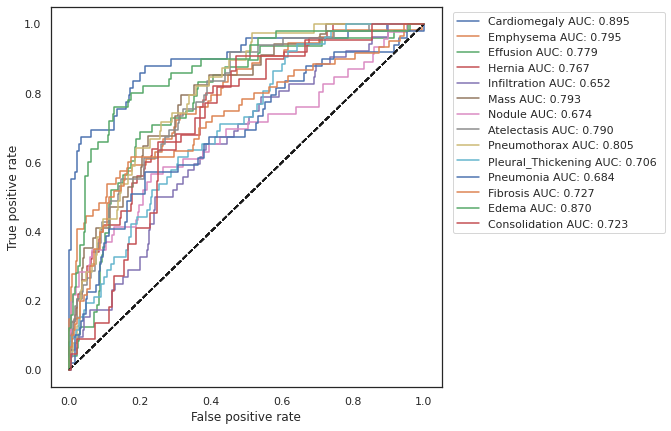

In [0]:
get_curve(y, pred, class_labels)